In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import json
import re
import folium
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("paper")
plt.style.use('seaborn')

In [2]:
#2.Defining path ,importing dataset, and cleaning
path=r'/Users/marieanek2/Documents/Youtube Trending Analysis'

In [3]:
#Using the US data set only. Importing data set
df_USA= pd.read_csv(os.path.join(path,'02 Data','Original Data','USvideos.csv'),index_col = False)

In [4]:
USA_categories=('r/Users/marieanek2/Documents/Youtube Trending Analysis/US_category_id.json')

In [5]:
id_to_cat = {}

with open('/Users/marieanek2/Documents/Youtube Trending Analysis/02 Data/Original Data/US_category_id.json', 'r') as f:
   data= json.load(f)

for category in data['items']:
    id_to_cat[category['id']] = category['snippet']['title']

In [6]:
id_to_cat

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [7]:
df_USA.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [9]:
df_USA.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [10]:
df_USA['trending_date'] = pd.to_datetime(df_USA['trending_date'], format='%y.%d.%m')

In [11]:
df_USA['publish_time'] = pd.to_datetime(df_USA['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [12]:
df_USA['category_id'] = df_USA['category_id'].astype(str)

In [13]:
df_USA.insert(5, 'category', df_USA['category_id'].map(id_to_cat))

In [14]:
df_USA['category'] = df_USA['category_id'].map(id_to_cat)

In [15]:
df_USA.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [16]:
df_USA['category'].value_counts()


Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category, dtype: int64

In [17]:
# Choosing only columns i need
df_USA=df_USA[['trending_date','channel_title','category','views', 'likes', 'dislikes','comment_count', 'comments_disabled', 
                  'ratings_disabled','publish_time','channel_title','video_error_or_removed']]

In [18]:
# Export Data to csv
df_USA.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_USA.csv'))

In [19]:
df_USA.head()

,trending_date,channel_title,category,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publish_time,channel_title,video_error_or_removed
0,2017-11-14,CaseyNeistat,People & Blogs,748374,57527,2966,15954,False,False,2017-11-13 17:13:01,CaseyNeistat,False
1,2017-11-14,LastWeekTonight,Entertainment,2418783,97185,6146,12703,False,False,2017-11-13 07:30:00,LastWeekTonight,False
2,2017-11-14,Rudy Mancuso,Comedy,3191434,146033,5339,8181,False,False,2017-11-12 19:05:24,Rudy Mancuso,False
3,2017-11-14,Good Mythical Morning,Entertainment,343168,10172,666,2146,False,False,2017-11-13 11:00:04,Good Mythical Morning,False
4,2017-11-14,nigahiga,Entertainment,2095731,132235,1989,17518,False,False,2017-11-12 18:01:41,nigahiga,False


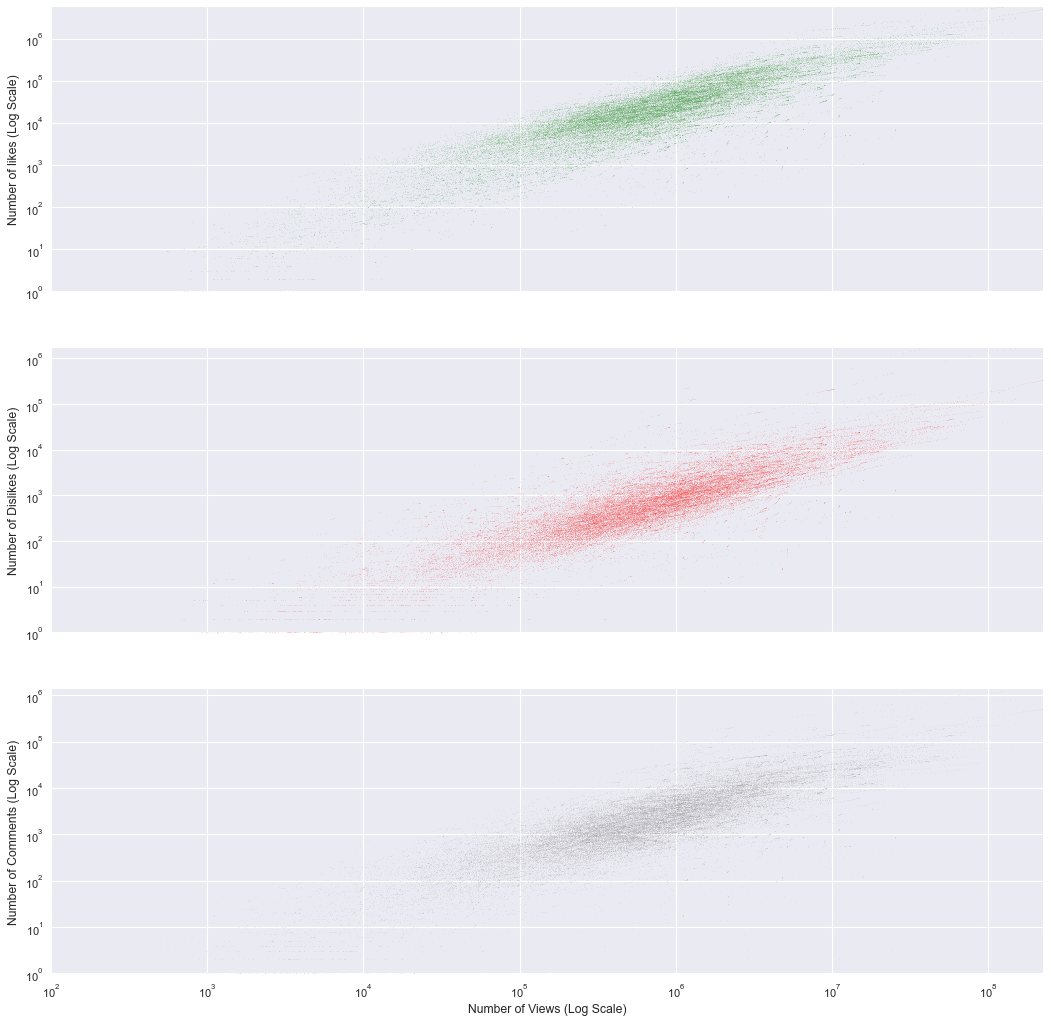

In [20]:
yAxes = ["likes", "dislikes", "comment_count"]
yLabels = ["Number of likes (Log Scale)", "Number of Dislikes (Log Scale)", "Number of Comments (Log Scale)"]
markerColors = ['green', 'red', 'grey']
fig,axes = plt.subplots(3,1, figsize=(16,16), sharex=True, dpi=80)
maxViews = df_USA["views"].max()
i = 0
for ax in axes:
    maxY = df_USA[yAxes[i]].max()
    ax = sns.scatterplot(ax=ax, x='views',y=yAxes[i],data=df_USA, s=0.1, color=markerColors[i])
    ax.set(xlabel="Number of Views (Log Scale)", ylabel=yLabels[i], xscale="log", yscale="log", ylim=(1,maxY), xlim=(100,maxViews))
    i = i + 1

#### Unsurprisingly it is clear that as the number of views increases, the number of comments,views and dislikes also increases. Now lets see if we can deduce any structure from the catagorical data - note that the stratification we see along the y-axis in the above figures is caused by the the fact we are looking at discreet low-number quantities

<AxesSubplot:xlabel='count', ylabel='category'>

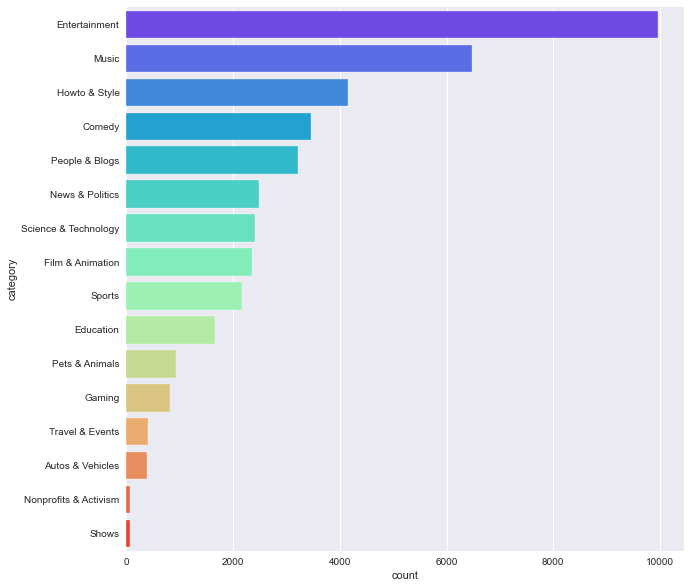

In [21]:
fig, ax = plt.subplots(figsize=(10,10))   

sns.countplot(y="category", data=df_USA, palette='rainbow', order = df_USA['category'].value_counts().index)

In [22]:
#Lets drop the Movies and Trailer data - there is too little data
df_USA = df_USA[~df_USA["category"].isin(['Movies', 'Trailers'])]

[Text(0, 1, '1'),
 Text(0, 2, '10'),
 Text(0, 3, '100'),
 Text(0, 4, '1,000'),
 Text(0, 5, '10,000'),
 Text(0, 6, '100,000'),
 Text(0, 7, '1,000,000'),
 Text(0, 8, '10,000,000')]

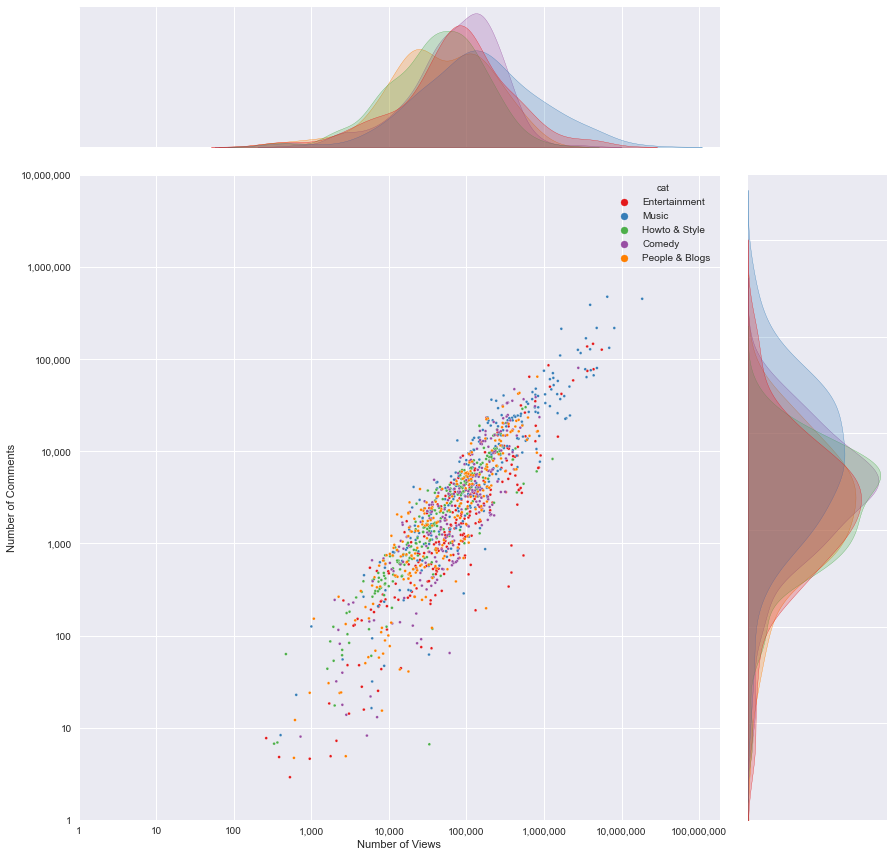

In [23]:
top5Cats = df_USA["category"].value_counts()[:5].index.tolist()
df_USA = df_USA[df_USA["likes"] > 0] 

allSamples = pd.DataFrame()
i= 0
for cat in top5Cats:
    sample = df_USA[(df_USA["category"] == cat)].sample(n=250, random_state=1)
    temp = pd.DataFrame()
    temp["views"] = sample["views"]
    temp["logViews"] = np.log10(temp["views"])    
    temp["likes"] = sample["likes"]
    temp["logLikes"] = np.log10(temp["likes"])    
    temp["dislikes"] = sample["dislikes"]
    temp["comment_count"] = sample["comment_count"]
    temp["cat"] = sample["category"]
    allSamples = allSamples.append(temp)
    
ax = sns.jointplot(x='logViews',y='logLikes',data=allSamples, s=8, hue="cat", kind="scatter", height=12, ratio = 4, palette="Set1")
ax.ax_joint.set_ylim(1,allSamples["logLikes"].max() + 1)
ax.ax_joint.set_xlim(1,allSamples["logViews"].max() + 1)

ax.ax_joint.set_ylabel('Number of Comments')
ax.ax_joint.set_xlabel('Number of Views')
ax.ax_joint.set_xticks([1,2,3,4,5,6,7,8,9])
ax.ax_joint.set_xticklabels(['1','10','100','1,000','10,000','100,000','1,000,000','10,000,000','100,000,000'])
ax.ax_joint.set_yticks([1,2,3,4,5,6,7,8])
ax.ax_joint.set_yticklabels(['1','10','100','1,000','10,000','100,000','1,000,000','10,000,000'])

#### As we can see the most viewed and most commented videos are dominated by the musical catagory, closely followed by entertainment, however we are only looking at the top 5 catagories by population size in the initial dataset, let's examine the viewership metrics of all catagories now.

In [24]:
import statsmodels.api as sm

In [25]:
# Choosing only columns i need
df_USA=df_USA[['trending_date','category','views', 'likes', 'dislikes','comment_count', 
                  'comments_disabled','video_error_or_removed']]

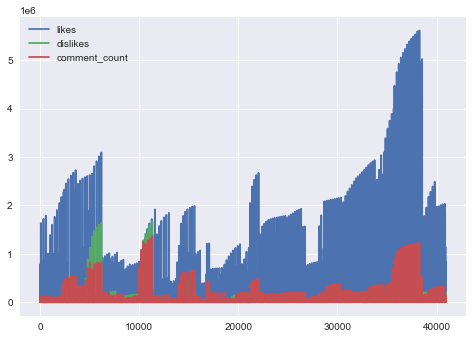

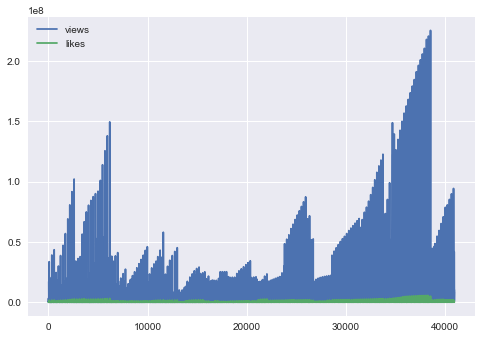

In [26]:
table = pd.pivot_table(df_USA, index=df_USA.index)
table.index = df_USA.index
_ = table[['likes','dislikes','comment_count']].plot()
_ = table[['views','likes']].plot()


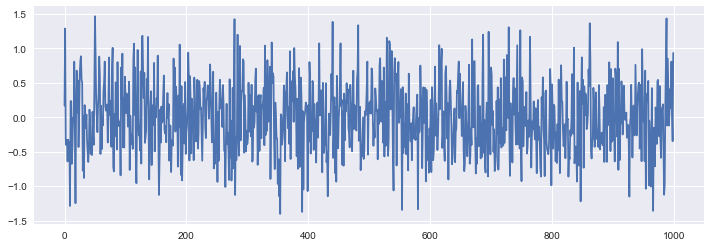

In [28]:
noise = np.random.normal(loc=0, scale=0.5, size=1000)

plt.figure(figsize=(12, 4))
plt.plot(noise);


In [29]:
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf

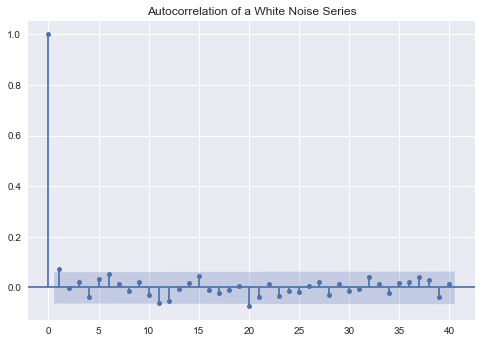

In [30]:
fig = plot_acf(noise, lags=40)

plt.title("Autocorrelation of a White Noise Series")
plt.show()

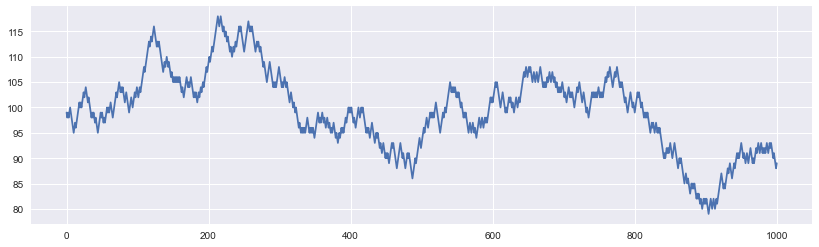

In [31]:
walk = [99]

for i in range(1000):
    # Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)

rcParams["figure.figsize"] = 14, 4
plt.plot(walk);

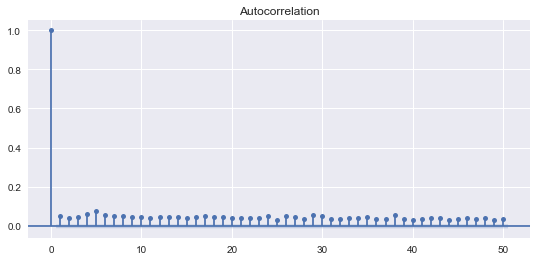

In [32]:
# Checking out a plot of autocorrelations

rcParams["figure.figsize"] = 9, 4
# ACF function up to 50 lags
fig = plot_acf(df_USA["views"], lags=50)

plt.show();

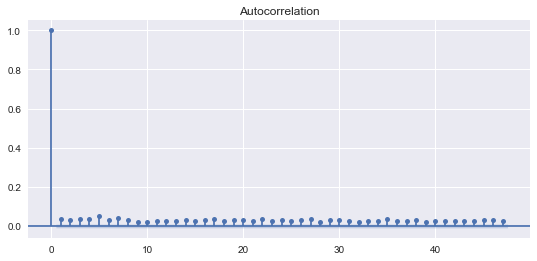

In [41]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_USA['likes'])
plt.show()

# Testing for stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function


In [43]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_USA['views'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.670825e+01
p-value                        1.441887e-29
Number of Lags Used            5.300000e+01
Number of Observations Used    4.072300e+04
Critical Value (1%)           -3.430511e+00
Critical Value (5%)           -2.861611e+00
Critical Value (10%)          -2.566808e+00
dtype: float64
